In [1]:
#Import all necessary modules
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
import copy
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('Holiday_Package.csv')

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [5]:
df.shape

(872, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [7]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872,NaN,NaN,NaN,436.5,251.869,1,218.75,436.5,654.25,872
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [11]:
df.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
def univariateanalysis(column):
    print('Description of '+column)
    print('.................................................................')
    print(df[column].describe())
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    
    print(sns.distplot(df[column],kde=True,color='g'))
    plt.show()
   
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    print(sns.boxplot(df[column]))
    plt.show()
    

In [14]:
j=df.loc[:,df.dtypes!=object].columns.to_list()
j

['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']

Description of Salary
.................................................................
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64
.................................................................
Plot for Salary
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


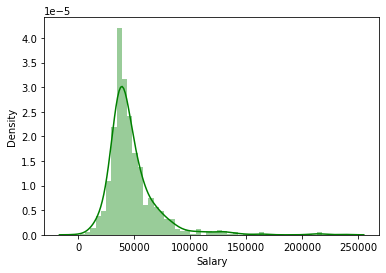

.................................................................
Plot for Salary
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


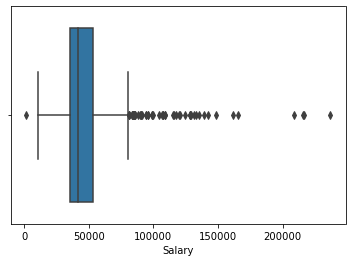

Description of age
.................................................................
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64
.................................................................
Plot for age
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


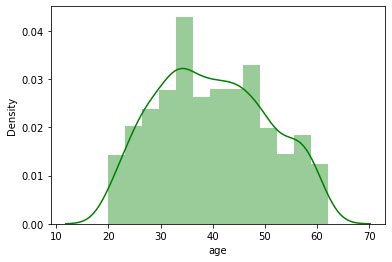

.................................................................
Plot for age
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


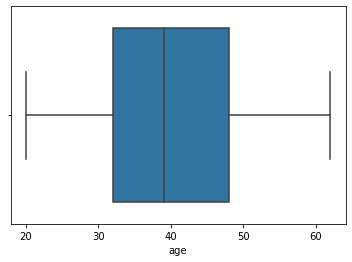

Description of educ
.................................................................
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64
.................................................................
Plot for educ
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


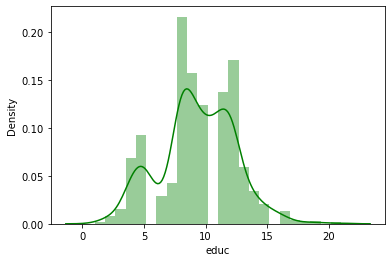

.................................................................
Plot for educ
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


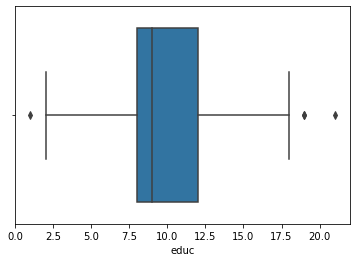

Description of no_young_children
.................................................................
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64
.................................................................
Plot for no_young_children
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


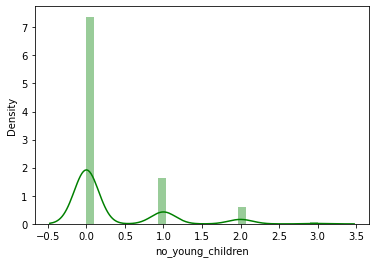

.................................................................
Plot for no_young_children
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


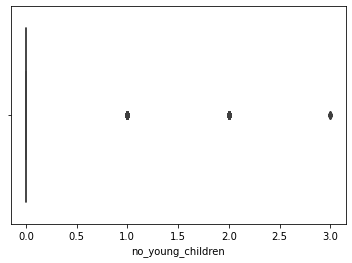

Description of no_older_children
.................................................................
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64
.................................................................
Plot for no_older_children
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


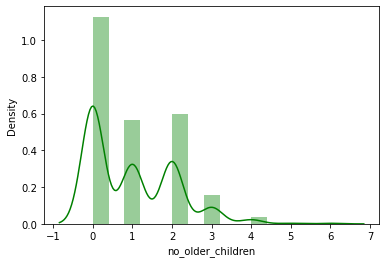

.................................................................
Plot for no_older_children
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


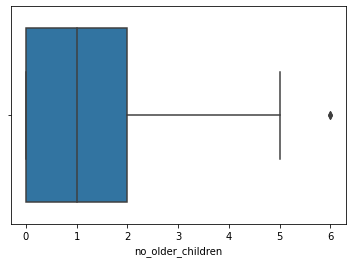

In [15]:
for i in j:
    univariateanalysis(i);

In [16]:
df.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [17]:
def univariateanalysis_cat(column):
    sns.countplot(df[column])
    plt.show()
    

In [18]:
k=df.loc[:,df.dtypes==object].columns.to_list()

In [19]:
k

['Holliday_Package', 'foreign']

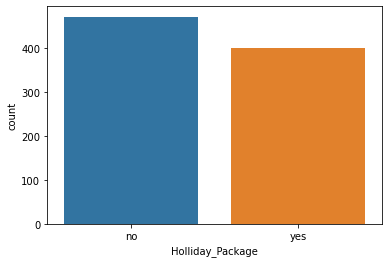

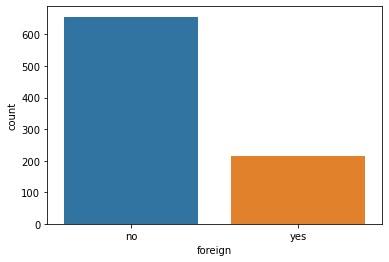

In [20]:
for i in k:
    univariateanalysis_cat(i)

In [21]:
def univariateanalysis_cat(column):
    sns.boxplot(x='Holliday_Package',y=column,data=df)
    plt.show()
    

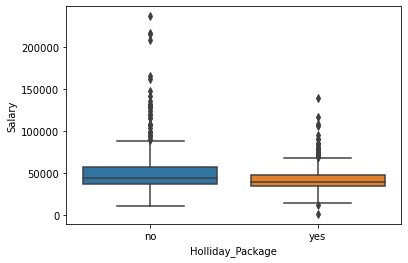

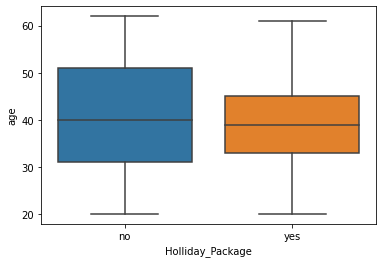

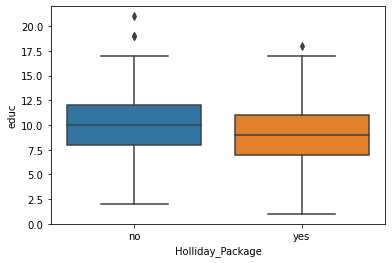

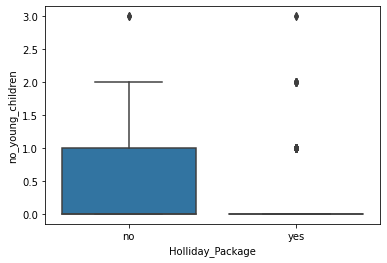

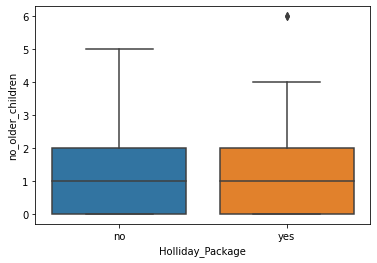

In [22]:
for k in j:
    univariateanalysis_cat(k)
    

<AxesSubplot:xlabel='age', ylabel='Salary'>

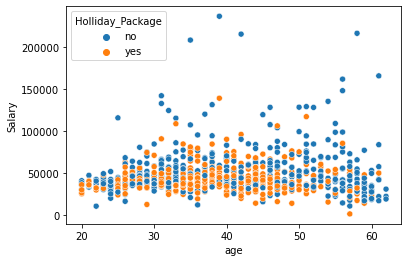

In [23]:
sns.scatterplot(x='age',y='Salary',data=df,hue='Holliday_Package')

<AxesSubplot:xlabel='educ', ylabel='Salary'>

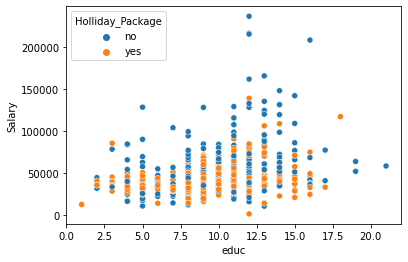

In [24]:
sns.scatterplot(x='educ',y='Salary',data=df,hue='Holliday_Package')

<AxesSubplot:xlabel='age', ylabel='no_young_children'>

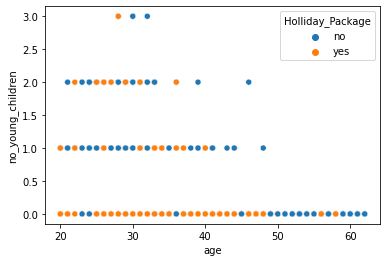

In [25]:
sns.scatterplot(x='age',y='no_young_children',data=df,hue='Holliday_Package')

<AxesSubplot:xlabel='age', ylabel='no_older_children'>

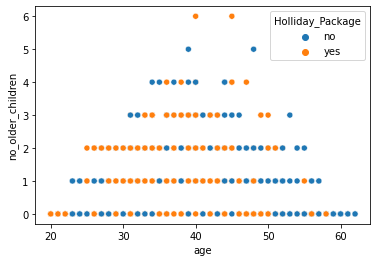

In [26]:
sns.scatterplot(x='age',y='no_older_children',data=df,hue='Holliday_Package')

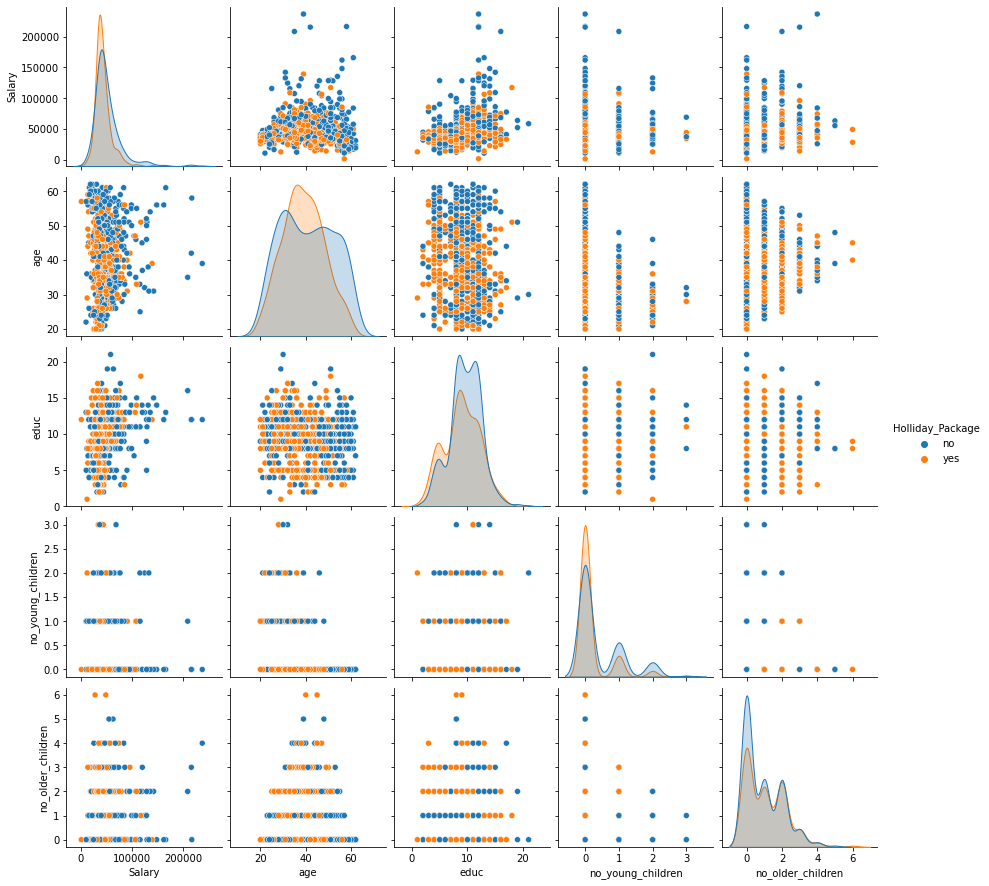

In [27]:
# Pairplot using sns

sns.pairplot(df , hue='Holliday_Package' , diag_kind = 'kde')

<AxesSubplot:>

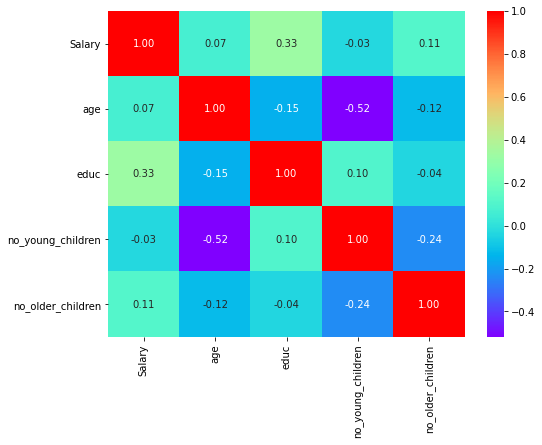

In [28]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='rainbow')

In [29]:
#Treating Outliers
df.loc[:,df.dtypes!=object].columns.to_list()

['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']

In [30]:
df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index


Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'], dtype='object')

In [31]:
j

['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [33]:
for column in j:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

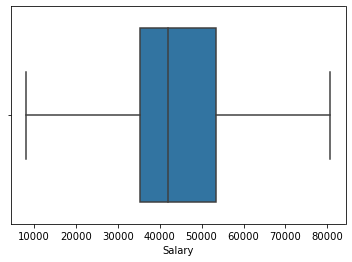

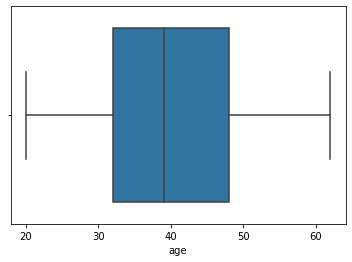

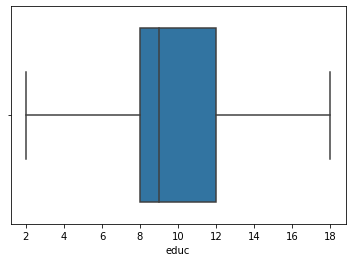

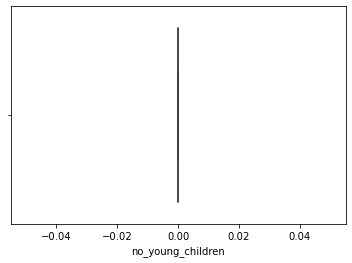

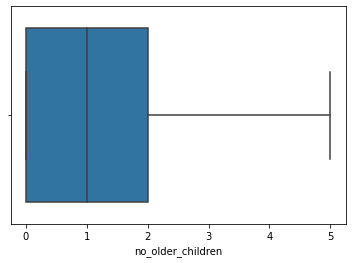

In [34]:
for i in j:
    sns.boxplot(df[i])
    plt.show()

In [35]:
df_new=df.copy()
df_new.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [36]:
### Converting categorical to dummy variables in data
data = pd.get_dummies(df, columns=['Holliday_Package','foreign'],drop_first = True)



In [37]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [38]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = data['Holliday_Package_yes']

In [39]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [40]:
y_train.value_counts(normalize=True)*100

0    53.934426
1    46.065574
Name: Holliday_Package_yes, dtype: float64

In [41]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [42]:

model = LogisticRegression(max_iter=100000,n_jobs=2)

In [43]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]})

In [45]:

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear')


In [46]:
best_model = grid_search.best_estimator_


In [47]:

# Prediction on the training & test set

ytrain_predict = best_model.predict(X_train)#X--
ytest_predict = best_model.predict(test_survey)#(X_test)#y-- 

In [81]:
# Prediction on the training set
ytrain_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [82]:
ytest_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=uint8)

In [48]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.637404,0.362596
1,0.587021,0.412979
2,0.650762,0.349238
3,0.576044,0.423956
4,0.538112,0.461888


              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.43      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 



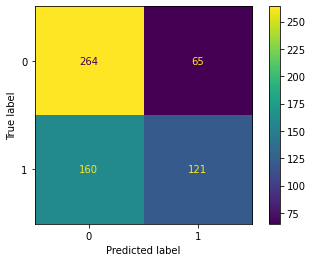

In [49]:

## Confusion matrix on the training data


plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.44      0.54       120

    accuracy                           0.65       262
   macro avg       0.66      0.64      0.63       262
weighted avg       0.66      0.65      0.64       262
 



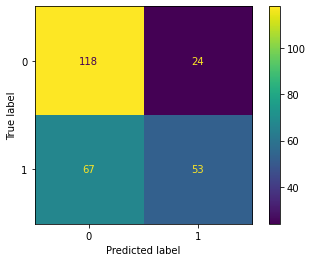

In [50]:

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [51]:

# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6311475409836066

AUC: 0.662


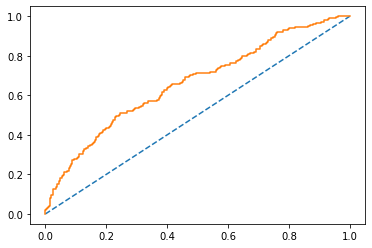

In [52]:

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


In [53]:
# Accuracy - Test Data

lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6526717557251909

AUC: 0.675


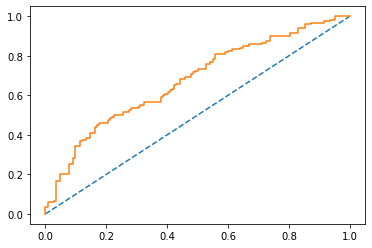

In [54]:

# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

LDA MODEL

In [55]:

df_new.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [56]:
df_new.shape

(872, 7)

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [58]:
df_new.Holliday_Package = pd.Categorical(df_new.Holliday_Package).codes
df_new['foreign'] = pd.Categorical(df_new['foreign']).codes

In [59]:
df_new.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


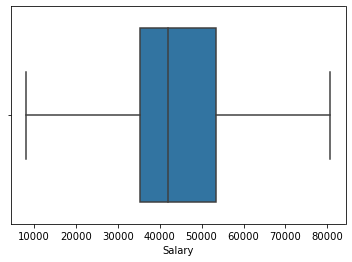

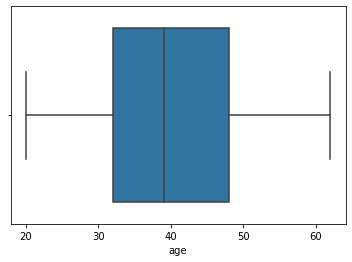

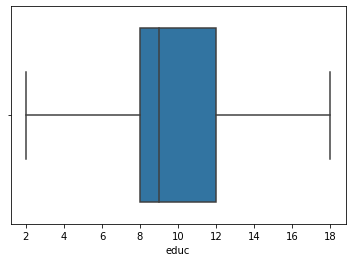

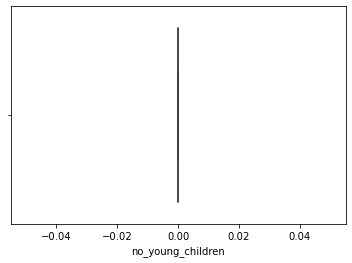

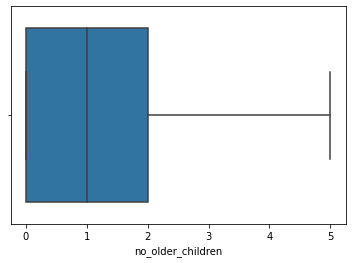

In [60]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df_new[i])
    plt.show()

In [61]:

X = df_new.drop('Holliday_Package',axis=1)
Y = df_new.pop('Holliday_Package')

In [62]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [63]:

#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [64]:

#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [65]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [66]:

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [67]:
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc

0.6327868852459017

In [1]:
## Confusion matrix on the training data
print('confusion_matrix \n',confusion_matrix(Y_train, pred_class_train),'\n')
print('classification_report \n',classification_report(Y_train, pred_class_train),'\n');

NameError: name 'confusion_matrix' is not defined

In [71]:
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.6564885496183206

In [78]:
## Confusion matrix on the test data
print('confusion_matrix \n',confusion_matrix(Y_test, pred_class_test),'\n')
print('classification_report \n',classification_report(Y_test, pred_class_test))

confusion_matrix 
 [[118  24]
 [ 66  54]] 

classification_report 
               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


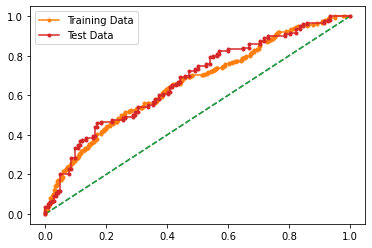

In [73]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

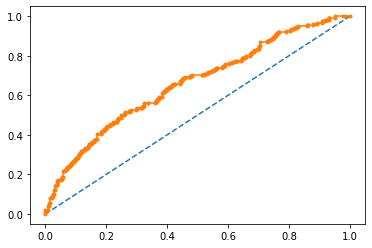

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

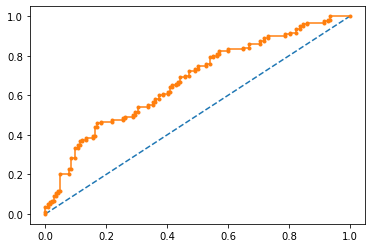

In [80]:
#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')